In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [164]:
data = pd.read_csv('heart.csv')
data['random_feature'] = np.random.uniform(-1, 1, data.shape[0])

# выкинуть все после random feature
# data = data[['ST_Slope', 'Oldpeak', 'Cholesterol', 'MaxHR', 'Age', 'ExerciseAngina', 'ChestPainType', 'HeartDisease']]

pd.concat([data.head(), data.tail()])

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,random_feature
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,-0.878613
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.148179
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.501475
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-0.244149
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.879863
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,-0.993946
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0.458856
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0.243481
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.779279
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0,0.888360


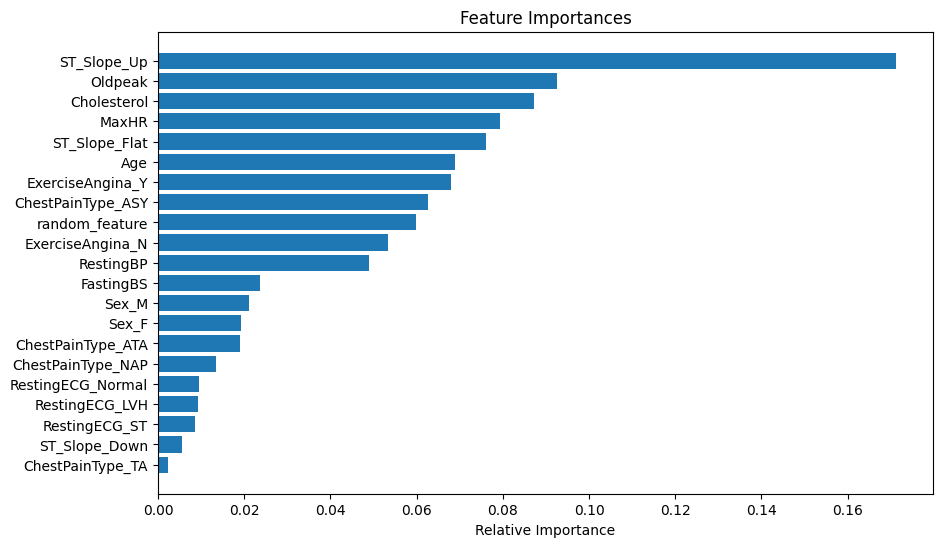

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
 12  random_feature  918 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 93.4+ KB


In [166]:
y = data['HeartDisease']
data.drop(['HeartDisease'], axis=1, inplace=True)

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((734, 12), (184, 12), (734,), (184,))

In [168]:
from sklearn.preprocessing import OneHotEncoder

def blow_df(ohe, df, cat_cols, fit=False, scaler=None):
    original_indices = df.index
    if fit:
        ohe.fit(df[cat_cols])
    encoded_data = ohe.transform(df[cat_cols])
    encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(), index=original_indices)
    original_df = df.drop(columns=cat_cols)
    if scaler:
        scaled_df = scaler.fit_transform(original_df)
        original_df = pd.DataFrame(scaled_df, columns=original_df.columns, index=original_indices)
    encoded_df = pd.concat([original_df, encoded_df], axis=1)
    return encoded_df


In [169]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

In [170]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# cat_cols = ['ChestPainType', 'ExerciseAngina', 'ST_Slope']

X_train = blow_df(ohe, X_train, cat_cols, fit=True, scaler=scaler)

pd.concat([X_train.head(), X_train.tail()])

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,random_feature,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,-1.245067,-0.708985,0.372803,1.842609,2.284353,-0.097061,-1.142948,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
25,-1.886236,-0.166285,0.086146,-0.542709,1.652241,-0.836286,0.628111,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
84,0.250993,0.919115,0.123134,1.842609,-0.441628,0.087745,1.095169,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10,-1.779375,-0.166285,0.104640,-0.542709,0.229991,-0.836286,0.954186,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
344,-0.283314,-0.708985,-1.846478,1.842609,-1.271274,-0.836286,0.645770,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
106,-0.603898,-0.708985,0.502261,-0.542709,-1.034232,-0.836286,1.024422,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
270,-0.924483,-0.708985,0.234098,-0.542709,0.150977,-0.836286,1.539231,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.678439,-0.166285,0.493014,-0.542709,0.309005,0.457358,-1.041166,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
435,0.678439,1.027656,-1.846478,-0.542709,-0.718176,-0.836286,-0.604467,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
102,-1.458790,0.919115,1.778348,-0.542709,-0.244093,1.011777,-0.457959,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [171]:
X_test = blow_df(ohe, X_test, cat_cols, fit=False, scaler=scaler)

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression()

def cvb(model, x, y):
    cvx = cross_validate(model,
                        x,
                        y,
                        cv=10,
                        return_train_score=True,
                        scoring=['accuracy', 'recall', 'precision', 'f1'])
    x = pd.DataFrame(cvx).T
    number_to_word = {
        0: 'zero',
        1: 'first',
        2: 'second',
        3: 'third',
        4: 'fourth',
        5: 'fifth',
        6: 'sixth',
        7: 'seventh',
        8: 'eighth',
        9: 'ninth'
    }
    x = x.rename(columns=number_to_word)
    x.columns += "_banana"
    x['min'] = x.min(axis=1)
    return x.T

cvb(model, X_train, y_train)

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
zero_banana,0.015253,0.003742,0.918919,0.868182,0.925000,0.900277,0.925000,0.864362,0.925000,0.881954
first_banana,0.044422,0.012797,0.878378,0.868182,0.875000,0.894737,0.897436,0.868280,0.886076,0.881310
second_banana,0.018696,0.011277,0.891892,0.872727,0.875000,0.905817,0.921053,0.867374,0.897436,0.886179
third_banana,0.010294,0.008809,0.864865,0.874242,0.902439,0.905556,0.860465,0.869333,0.880952,0.887075
fourth_banana,0.014493,0.010448,0.835616,0.880484,0.875000,0.914127,0.833333,0.873016,0.853659,0.893099
fifth_banana,0.016456,0.008319,0.890411,0.869894,0.925000,0.891967,0.880952,0.872629,0.902439,0.882192
sixth_banana,0.016039,0.007007,0.780822,0.886536,0.825000,0.911357,0.785714,0.884409,0.804878,0.897681
seventh_banana,0.007027,0.008104,0.876712,0.878971,0.900000,0.905817,0.878049,0.876676,0.888889,0.891008
eighth_banana,0.013241,0.004999,0.904110,0.869894,0.950000,0.900277,0.883721,0.866667,0.915663,0.883152
ninth_banana,0.012379,0.000508,0.849315,0.878971,0.925000,0.905817,0.822222,0.876676,0.870588,0.891008


In [173]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from pprint import pprint
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import Ridge
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform

models=[
      {'name':'NB', "model":BernoulliNB(), 'params':{'alpha': uniform(loc=0, scale=4)}},  
      {'name':'Lr', "model": LogisticRegression()  , 'params':{'C':[0.1,0.2,0.3,0.5,0.7,0.8,0.9,1]}},
      {'name':'R', "model": Ridge(), 'params':{'alpha': uniform(loc=0, scale=4), 'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}},
      {'name':'SVC', "model": SVC(), 'params':{'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'gamma':['scale', 'auto']}},
      {'name':'RF', "model": RandomForestClassifier(), 'params':{'n_estimators': randint(10, 200), 'max_depth': randint(2, 25), 'min_samples_leaf': randint(1, 15), 'criterion': ['gini', 'entropy', 'log_loss']}},
      {'name':'KN', "model": KNeighborsClassifier(), 'params':{'n_neighbors':list(range(1,30)),'weights': ['uniform', 'distance'], 'p':[1,2,3]}},
      {'name':'DT', "model": DecisionTreeClassifier(), 'params':{'criterion':['gini', 'entropy'], 'max_depth':[3,5,7,9,11]}}
]

res=[]
for mp in models:
    print("doing model", mp['model'])
    res.append((mp['name'], RandomizedSearchCV(mp['model'], mp['params'], cv=10, n_jobs=-1, n_iter=50, random_state=42).fit(X_train, y_train)))
print('\ndelimiter -----', end='\n\n')
for i, r in enumerate(res):
    print(i, r[0], r[1].best_score_, r[1].best_params_)


doing model BernoulliNB()
doing model LogisticRegression()
doing model Ridge()


x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


doing model SVC()


x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


doing model RandomForestClassifier()
doing model KNeighborsClassifier()
doing model DecisionTreeClassifier()

delimiter -----

0 NB 0.8568863383931877 {'alpha': 1.49816047538945}
1 Lr 0.8691040355423917 {'C': 0.9}
2 R 0.5574993353002516 {'alpha': 3.861021229056552, 'solver': 'sparse_cg'}
3 SVC 0.8731766012587929 {'kernel': 'rbf', 'gamma': 'auto'}
4 RF 0.8772861902998889 {'criterion': 'log_loss', 'max_depth': 12, 'min_samples_leaf': 3, 'n_estimators': 90}
5 KN 0.8719363198815253 {'weights': 'distance', 'p': 1, 'n_neighbors': 10}
6 DT 0.8432062199185488 {'max_depth': 3, 'criterion': 'entropy'}


x:\_Netology\DS_ModelsParametersModule1\env\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [174]:
bee = res[4][1]
pprint(bee.best_params_)
print("Best score: ", bee.best_score_)
pprint(bee.best_estimator_)

cvb(bee.best_estimator_, X_train, y_train)

{'criterion': 'log_loss',
 'max_depth': 12,
 'min_samples_leaf': 3,
 'n_estimators': 90}
Best score:  0.8772861902998889
RandomForestClassifier(criterion='log_loss', max_depth=12, min_samples_leaf=3,
                       n_estimators=90)


,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
zero_banana,0.149989,0.010119,0.891892,0.928788,0.95000,0.958449,0.863636,0.915344,0.904762,0.936401
first_banana,0.138588,0.011322,0.878378,0.933333,0.87500,0.952909,0.897436,0.927224,0.886076,0.939891
second_banana,0.145801,0.014346,0.905405,0.939394,0.90000,0.958449,0.923077,0.932615,0.911392,0.945355
third_banana,0.147449,0.011401,0.905405,0.937879,0.95122,0.955556,0.886364,0.932249,0.917647,0.943759
fourth_banana,0.150492,0.010910,0.808219,0.933434,0.90000,0.958449,0.782609,0.922667,0.837209,0.940217
fifth_banana,0.137060,0.008016,0.876712,0.937973,0.92500,0.961219,0.860465,0.927807,0.891566,0.944218
sixth_banana,0.149604,0.010046,0.821918,0.934947,0.90000,0.961219,0.800000,0.922872,0.847059,0.941655
seventh_banana,0.139912,0.010245,0.849315,0.936460,0.87500,0.961219,0.853659,0.925333,0.864198,0.942935
eighth_banana,0.136694,0.014116,0.876712,0.928896,0.95000,0.952909,0.844444,0.919786,0.894118,0.936054
ninth_banana,0.132525,0.011110,0.821918,0.939486,0.90000,0.961219,0.800000,0.930295,0.847059,0.945504


In [175]:
from sklearn.metrics import confusion_matrix, classification_report

bes = bee.best_estimator_
y_pred = bes.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[66 11]
 [12 95]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [176]:
# %pip install hyperopt

In [177]:
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

search_space = {
    'n_estimators': hp.quniform('n_estimators', 10, 200, 1),
    'max_depth': hp.quniform('max_depth', 2, 30, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 15, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy', 'log_loss']),
    'min_samples_split': hp.quniform('min_samples_split', 2, 15, 1)
}

def objective(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_samples_split'] = int(params['min_samples_split'])
    params['min_samples_leaf'] = int(params['min_samples_leaf'])
    model = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy').mean()
    return {'loss': -score, 'status': STATUS_OK}

trials = Trials()
random_state = np.random.default_rng(42)
best = fmin(fn=objective, space=search_space, algo=tpe.suggest, max_evals=75, trials=trials, rstate=random_state)
best


100%|██████████| 75/75 [02:12<00:00,  1.77s/trial, best loss: -0.8731395779340984]


{'criterion': 2,
 'max_depth': 13.0,
 'min_samples_leaf': 2.0,
 'min_samples_split': 12.0,
 'n_estimators': 190.0}

In [178]:
best['criterion'] = ['gini', 'entropy', 'log_loss'][best['criterion']]
best['max_depth'] = int(best['max_depth'])
best['min_samples_split'] = int(best['min_samples_split'])
best['min_samples_leaf'] = int(best['min_samples_leaf'])
best['n_estimators'] = int(best['n_estimators'])

best_final = RandomForestClassifier(**best).fit(X_train, y_train)

cvb(best_final, X_train, y_train)

,fit_time,score_time,test_accuracy,train_accuracy,test_recall,train_recall,test_precision,train_precision,test_f1,train_f1
zero_banana,0.292946,0.014112,0.891892,0.915152,0.95000,0.950139,0.863636,0.900262,0.904762,0.924528
first_banana,0.284748,0.015113,0.891892,0.925758,0.90000,0.950139,0.900000,0.917112,0.900000,0.933333
second_banana,0.314005,0.011120,0.905405,0.930303,0.90000,0.952909,0.923077,0.922252,0.911392,0.937330
third_banana,0.281791,0.023601,0.905405,0.922727,0.95122,0.944444,0.886364,0.916442,0.917647,0.930233
fourth_banana,0.277830,0.018897,0.808219,0.918306,0.90000,0.947368,0.782609,0.907162,0.837209,0.926829
fifth_banana,0.292426,0.017633,0.890411,0.925870,0.92500,0.952909,0.880952,0.914894,0.902439,0.933514
sixth_banana,0.320187,0.015821,0.821918,0.922844,0.90000,0.947368,0.800000,0.914439,0.847059,0.930612
seventh_banana,0.274910,0.019805,0.863014,0.925870,0.90000,0.955679,0.857143,0.912698,0.878049,0.933694
eighth_banana,0.293226,0.016838,0.890411,0.919818,0.95000,0.947368,0.863636,0.909574,0.904762,0.928087
ninth_banana,0.309876,0.010155,0.794521,0.921331,0.90000,0.952909,0.765957,0.907652,0.827586,0.929730


In [179]:
y_pred = best_final.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[66 11]
 [11 96]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



матрица с урезанным количеством признаков  

[[68  9] = 24  
 [15 92]] = 160  
  
матрица со всеми признаками  

[[66 11] = 22  
 [11 96]] = 162  

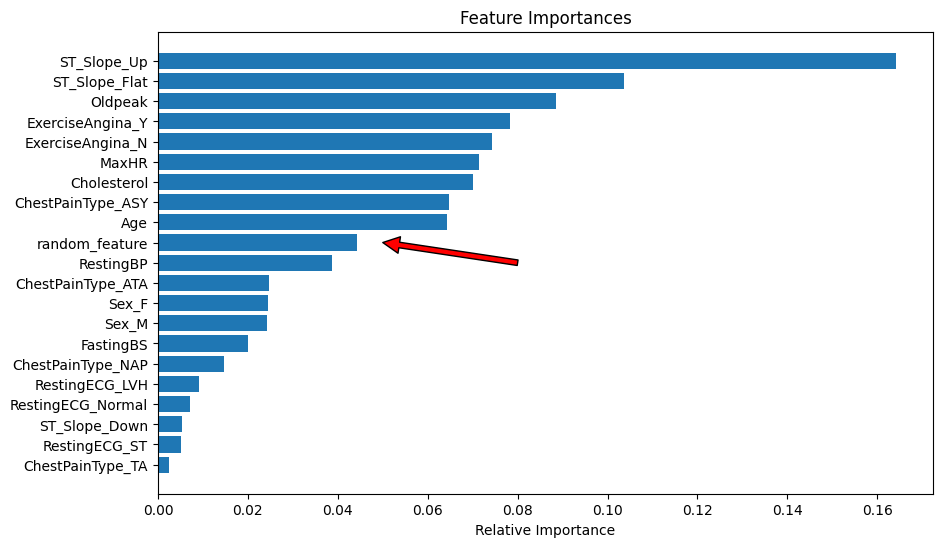

In [208]:
feature_importances = best_final.feature_importances_
indices = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.annotate('',
             xy=(0.05, 11), 
             xytext=(0.08, 10),
             arrowprops=dict(facecolor='red', shrink=0.0),
             fontsize=15, color='red')
plt.show()

### 1. Загрузка и подготовка данных
- Загрузили данные из файла `heart.csv`.
- Добавили случайную характеристику `random_feature` в диапазоне от -1 до 1.
- Подготовили целевую переменную `HeartDisease` и удалили её из набора данных.

### 2. Разделение данных на обучающую и тестовую выборки
- Разделили данные на обучающую и тестовую выборки с использованием функции `train_test_split`. Размер тестовой выборки составил 20% от общего количества данных.

### 3. Преобразование категориальных признаков
- Использовали `OneHotEncoder` для кодирования категориальных признаков: `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope`.
- Преобразовали данные с помощью функции `blow_df`, применив стандартизацию числовых признаков с использованием `StandardScaler`.

### 4. Обучение модели логистической регрессии
- Провели кросс-валидацию модели логистической регрессии с использованием функции `cross_validate`. Оценили метрики качества модели, включая точность, полноту, точность и F1-score.

### 5. Поиск оптимальных гиперпараметров
- Использовали `RandomizedSearchCV` для подбора гиперпараметров нескольких моделей:
  - Bernoulli Naive Bayes
  - Логистическая регрессия
  - Ridge Regression
  - Support Vector Classifier (SVC)
  - Random Forest
  - K-Nearest Neighbors (KNN)
  - Decision Tree
- Для каждой модели определили наилучшие параметры и оценили их точность.

### 6. Обучение и оценка лучшей модели
- Лучшей моделью оказался `RandomForestClassifier` с критериями `log_loss`, глубиной дерева 12, минимальным количеством образцов на листе 3 и количеством деревьев 90.
- Провели кросс-валидацию для лучшей модели и оценили метрики качества.
- Построили confusion matrix и рассчитали основные метрики для тестовой выборки: точность, полноту, точность и F1-score.

### 7. Дополнительный поиск гиперпараметров с использованием Hyperopt
- Использовали библиотеку Hyperopt для оптимизации гиперпараметров модели Random Forest.
- Нашли наилучшие параметры и обучили модель с их использованием.
- Провели кросс-валидацию для окончательной модели и оценили метрики качества.

### Заключение
Работа показала, что с использованием правильного подхода к предобработке данных, выбору и настройке моделей машинного обучения можно достичь высокой точности. Модель Random Forest показала наилучшие результаты среди всех рассмотренных моделей.